<a href="https://colab.research.google.com/github/Rimcode-ai/MLmodelPredict-Heart-Failure-Prediction-Dataset/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import pandas as pd
import kagglehub
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder # Import LabelEncoder for encoding

In [17]:
# Download latest version
dataset_path = kagglehub.dataset_download("fedesoriano/heart-failure-prediction")

# Find the CSV file within the downloaded directory
for filename in os.listdir(dataset_path):
    if filename.endswith(".csv"):
        csv_file_path = os.path.join(dataset_path, filename)
        break  # Stop after finding the first CSV file

# Read the CSV file
data = pd.read_csv(csv_file_path)
print(data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Columns in the dataset: Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')
Mean Squared Error: 0.1372907785161545
R-squared: 0.4358397138678326
Predicted results:
[ 0.04794235  0.21721714  0.89506446  1.00781244  0.12826114  0.63776917
  0.62482197  0.21595977  0.43488636  1.29845514  0.41798386  0.26639801
  0.50055258  0.19413543  0.7546319   0.55907958 -0.0181726   0.99247625
  0.56819061  0.13044493  0.52035794  0.67064364  0.03024225  0.6208166
  1.12060782  0.77728375  0.15964198  1.05174857  0.15507752  0.09059003
  0.53470836  0.21472156  0.82263773  0.85388541  1.23413202  0.68732865
  0.84973309  0.0430727   0.79842813  0.67483231  0.71316471  0.77694094
  0.97493657  0.22278727  0.21332518  0.60256704  0.36171728  0.95298185
  0.81590747  0.40583836  0.15807018  0.11525484  0.67817315  0.81086981
  0.61870989  0.41191727  0.41980188

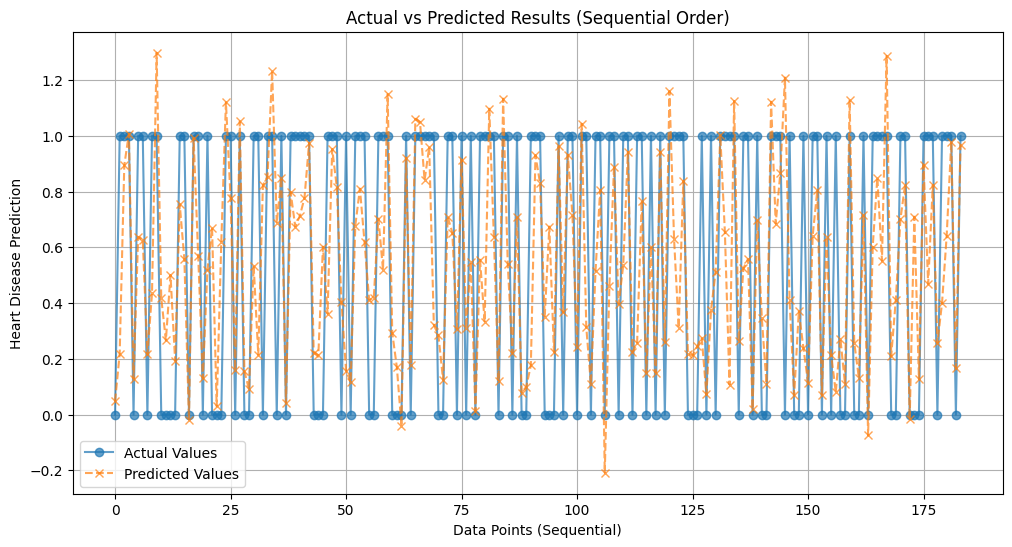

In [18]:
# Print column names for debugging
print("Columns in the dataset:", data.columns)

# Adjust column names if necessary, or use columns dynamically
categorical_columns = ['Sex', 'ChestPainType', 'RestingECG', 'FastingBS', 'ExerciseAngina', 'ST_Slope']  # Add potentially categorical columns
categorical_columns = [col for col in categorical_columns if col in data.columns]  # Only use available columns

# Preprocess data: Label encoding for string categorical variables
for col in categorical_columns:
    if data[col].dtype == 'object':  # Check if column is of object (string) type
        le = LabelEncoder()
        data[col] = le.fit_transform(data[col]) # Encode string values to numerical labels

# Define features (X) and target variable (y)
X = data.drop(columns=['HeartDisease'])  # Features
y = data['HeartDisease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics and predictions
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print("Predicted results:")
print(y_pred)

# Prepare data for visualization
test_results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
test_results = test_results.sort_index()  # Sort by index to maintain sequence

# Plot actual vs predicted results sequentially
plt.figure(figsize=(12, 6))
plt.plot(test_results['Actual'], label='Actual Values', marker='o', linestyle='-', alpha=0.7)
plt.plot(test_results['Predicted'], label='Predicted Values', marker='x', linestyle='--', alpha=0.7)
plt.title('Actual vs Predicted Results (Sequential Order)')
plt.xlabel('Data Points (Sequential)')
plt.ylabel('Heart Disease Prediction')
plt.legend()
plt.grid(True)
plt.show()